Final Project Submission

Student name: LYNN WANJIKU NDERO





Student pace: FULL TIME

Scheduled project review date/time: 1 WEEK

Instructor name: ANTONNY MUIKO

Blog post URL

PROJECT TITLE : 

Business Understanding

Microsoft want to embark on the business of creating original videos since they can see other big companies creating their own original video. They have decided to create a new movie studio.

Problem Statement

We need to explore the different movie genres and get to know the success criteria for the movie genres at the box office by analysing the data. The results derived from the exploratory analysis will be used by the business stakeholder to determine which genre they will create from their studio.

Overview


Main Objective

Determine the best movie genres with the highest returns in terms of both the domestic gross and foreign gross.

Specific Objectives

1. Identify the top_ten best films
2. Evaluate the gross collected from the films 
3. Identify the success criteria of the films to the movie studios

Import the pandas library 


In [2]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Open 'bom.movies_gross.csv' data using pd.read_csv

In [102]:
movies_df = pd.read_csv('bom.movie_gross.csv')

In [85]:
movies_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


imported SQLITE3 library and opened 'IM.DB' file by query 

In [5]:
conn = sqlite3.connect('im.db')
# Load data from SQLite database
conn = sqlite3.connect('im.db')
movie_basics = pd.read_sql_query('SELECT * FROM movie_basics', conn)
movie_ratings = pd.read_sql_query('SELECT * FROM movie_ratings', conn)

In [6]:
movie_basics 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [7]:
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


2. DATA PREPARATION


2.1 Discovering how many missing values are there in movie_df 

In [103]:
movies_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [104]:
movies_df.shape

(3387, 5)

In [105]:
#provide a summary of the metadata to be able to identify the columns with the missing values
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Replacing missing values in foreign_gross column with the median but first converting the datatype from string to float

In [106]:
#converting datatype string into float using .str.replace function
movies_df['foreign_gross'] = movies_df['foreign_gross'].str.replace(',','').astype(float)

In [107]:
#filling in the missing values with the .median of the foreign_gross column
movies_df['foreign_gross'].fillna(movies_df['foreign_gross'].median(), inplace= True)

In [108]:
#confirming the values have been filled in the dataframe
movies_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,18700000.0,2018
3383,Edward II (2018 re-release),FM,4800.0,18700000.0,2018
3384,El Pacto,Sony,2500.0,18700000.0,2018
3385,The Swan,Synergetic,2400.0,18700000.0,2018


In [109]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


2.1.2 Drop rows from movie_df with missing values 

In [110]:
#using .dropna to remove all missing values 
movies_df.dropna(axis=0, inplace = True)

In [111]:
#confirming if there are any Nan values by column
movies_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

2.1.2.2 Domestic_gross columns

In [112]:
#Since the column has a few values missing then we can drop the rows in the column
movies_df.dropna(subset = 'domestic_gross', inplace = True)

In [113]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


2.2 Discovering how many missing values are there in movie_basics

In [17]:
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [18]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [19]:
movie_basics.dropna(subset= 'original_title', inplace = True)

In [20]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146123 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146123 non-null  object 
 1   primary_title    146123 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146123 non-null  int64  
 4   runtime_minutes  114401 non-null  float64
 5   genres           140734 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


In [21]:
movie_basics.dropna(subset= 'genres', inplace = True)

In [22]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140734 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         140734 non-null  object 
 1   primary_title    140734 non-null  object 
 2   original_title   140734 non-null  object 
 3   start_year       140734 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           140734 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB


In [23]:
movie_basics = movie_basics.dropna()

In [24]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


Checking for any duplicates

In [115]:

movie_basics.duplicated().sum()

0

2.3 Checking for missing values in movie_ratings

In [25]:
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [116]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Checking for duplicates in movie_rating

In [117]:
movie_ratings.duplicated().sum()

0

Merging the tables using movie_id column

In [118]:
movies_reviews_and_rating = movie_basics.merge(movie_ratings, on='movie_id').merge(movies_df, left_on='primary_title', right_on='title')

In [119]:
movies_reviews_and_rating

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,18700000.0,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000.0,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,On the Road,IFC,744000.0,8000000.0,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,On the Road,IFC,744000.0,8000000.0,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.1,147,The Chambermaid,FM,300.0,18700000.0,2015
2948,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,How Long Will I Love U,WGUSA,747000.0,82100000.0,2018
2949,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Helicopter Eela,Eros,72000.0,18700000.0,2018
2950,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322,Last Letter,CL,181000.0,18700000.0,2018


In [120]:
#drop all duplicates
movies_reviews_and_rating = movies_reviews_and_rating.drop(columns=['original_title','title'])

In [121]:
movies_reviews_and_rating

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,18700000.0,2016
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000.0,2012
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000.0,2012
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000.0,2012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000.0,2013
...,...,...,...,...,...,...,...,...,...,...,...
2947,tt8331988,The Chambermaid,2018,102.0,Drama,7.1,147,FM,300.0,18700000.0,2015
2948,tt8404272,How Long Will I Love U,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000.0,2018
2949,tt8427036,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,18700000.0,2018
2950,tt9078374,Last Letter,2018,114.0,"Drama,Romance",6.4,322,CL,181000.0,18700000.0,2018


In [122]:
movies_reviews_and_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         2952 non-null   object 
 1   primary_title    2952 non-null   object 
 2   start_year       2952 non-null   int64  
 3   runtime_minutes  2952 non-null   float64
 4   genres           2952 non-null   object 
 5   averagerating    2952 non-null   float64
 6   numvotes         2952 non-null   int64  
 7   studio           2952 non-null   object 
 8   domestic_gross   2952 non-null   float64
 9   foreign_gross    2952 non-null   float64
 10  year             2952 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 253.8+ KB


3. EXPLORATORY DATA ANALYSIS

List of top_ten movies based on numvotes and averagerating columns

In [123]:
movies_reviews_and_rating

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,18700000.0,2016
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000.0,2012
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000.0,2012
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000.0,2012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000.0,2013
...,...,...,...,...,...,...,...,...,...,...,...
2947,tt8331988,The Chambermaid,2018,102.0,Drama,7.1,147,FM,300.0,18700000.0,2015
2948,tt8404272,How Long Will I Love U,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000.0,2018
2949,tt8427036,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,18700000.0,2018
2950,tt9078374,Last Letter,2018,114.0,"Drama,Romance",6.4,322,CL,181000.0,18700000.0,2018


In [130]:
#select the required columns from the movie_reviews_and rating table 
movie_genres_ratings = movies_reviews_and_rating[['movie_id','runtime_minutes','genres','averagerating','numvotes','studio','year']]
movie_genres_ratings

,movie_id,runtime_minutes,genres,averagerating,numvotes,studio,year
0,tt0315642,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,2016
1,tt0337692,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,2012
2,tt4339118,89.0,Drama,6.0,6,IFC,2012
3,tt5647250,121.0,Drama,5.7,127,IFC,2012
4,tt0359950,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,2013
...,...,...,...,...,...,...,...
2947,tt8331988,102.0,Drama,7.1,147,FM,2015
2948,tt8404272,101.0,Romance,6.5,607,WGUSA,2018
2949,tt8427036,135.0,Drama,5.4,673,Eros,2018
2950,tt9078374,114.0,"Drama,Romance",6.4,322,CL,2018


In [132]:
#get a list of the top ten movie genres based on average rating
Top_ten_movie_genre = movie_genres_ratings[['genres','runtime_minutes','averagerating','studio','year']].sort_values(by = 'averagerating',ascending=False)
Top_ten_movie_genre.head(10)

,genres,runtime_minutes,averagerating,studio,year
171,Adventure,108.0,9.2,App.,2010
626,Documentary,78.0,9.2,RAtt.,2017
2029,Drama,115.0,9.1,UTMW,2017
607,Documentary,85.0,9.0,PDA,2011
1135,"Comedy,Documentary,Drama",68.0,8.9,WGUSA,2017
2951,"Documentary,Music",84.0,8.8,Trafalgar,2018
485,"Action,Adventure,Sci-Fi",148.0,8.8,WB,2010
795,Documentary,78.0,8.8,Magn.,2015
480,"Drama,History,War",192.0,8.7,Wein.,2012
1047,"Documentary,History",110.0,8.7,NAV,2010


In [133]:
#get the top_ten movie genres based on number of votes
movie_genres_votes = movie_genres_ratings[['genres','runtime_minutes','numvotes','studio']].sort_values(by='numvotes', ascending=False)
movie_genres_votes.head(10)

,genres,runtime_minutes,numvotes,studio
485,"Action,Adventure,Sci-Fi",148.0,1841066,WB
456,"Action,Thriller",164.0,1387769,WB
101,"Adventure,Drama,Sci-Fi",169.0,1299334,Par.
1296,"Drama,Western",165.0,1211405,Wein.
162,"Biography,Crime,Drama",180.0,1035358,Par.
236,"Mystery,Thriller",138.0,1005960,Par.
1476,"Action,Adventure,Comedy",121.0,948394,BV
574,"Action,Adventure,Comedy",108.0,820847,Fox
501,"Action,Adventure,Sci-Fi",142.0,795227,LGF
502,"Action,Adventure,Sci-Fi",120.0,780910,WB


Evaluate the gross collected from the top movie genres

In [126]:
#domestic and foreign gross collected from the top ten movie genres
Top_ten_movie_grosscollected = movies_reviews_and_rating[['genres','averagerating','studio','domestic_gross','foreign_gross']].sort_values(by='averagerating', ascending=False)
Top_ten_movie_grosscollected.head(10)

,genres,averagerating,studio,domestic_gross,foreign_gross
171,Adventure,9.2,App.,3600000.0,1100000.0
626,Documentary,9.2,RAtt.,1800000.0,2700000.0
2029,Drama,9.1,UTMW,62500.0,18700000.0
607,Documentary,9.0,PDA,4400000.0,18700000.0
1135,"Comedy,Documentary,Drama",8.9,WGUSA,96800.0,18700000.0
2951,"Documentary,Music",8.8,Trafalgar,4200000.0,16100000.0
485,"Action,Adventure,Sci-Fi",8.8,WB,292600000.0,535700000.0
795,Documentary,8.8,Magn.,1200.0,18700000.0
480,"Drama,History,War",8.7,Wein.,757000.0,315000.0
1047,"Documentary,History",8.7,NAV,26300.0,250000.0


In [139]:
#calculating the profits for the movie_genres
Top_ten_movie_grosscollected['profits'] = Top_ten_movie_grosscollected['foreign_gross'] - Top_ten_movie_grosscollected['domestic_gross']
Top_ten_movie_grosscollected.head(10)

,genres,averagerating,studio,domestic_gross,foreign_gross,profits
171,Adventure,9.2,App.,3600000.0,1100000.0,-2500000.0
626,Documentary,9.2,RAtt.,1800000.0,2700000.0,900000.0
2029,Drama,9.1,UTMW,62500.0,18700000.0,18637500.0
607,Documentary,9.0,PDA,4400000.0,18700000.0,14300000.0
1135,"Comedy,Documentary,Drama",8.9,WGUSA,96800.0,18700000.0,18603200.0
2951,"Documentary,Music",8.8,Trafalgar,4200000.0,16100000.0,11900000.0
485,"Action,Adventure,Sci-Fi",8.8,WB,292600000.0,535700000.0,243100000.0
795,Documentary,8.8,Magn.,1200.0,18700000.0,18698800.0
480,"Drama,History,War",8.7,Wein.,757000.0,315000.0,-442000.0
1047,"Documentary,History",8.7,NAV,26300.0,250000.0,223700.0


In [140]:
#using statistical method to get the mean, median, IQR, standard deviation of the movie_reviews_and ratings
movie_stat_summary = movies_reviews_and_rating[['runtime_minutes','domestic_gross','foreign_gross','profits']].describe()
movie_stat_summary

,runtime_minutes,domestic_gross,foreign_gross,profits
count,2952.000000,2.952000e+03,2.952000e+03,2.952000e+03
mean,107.305894,3.068027e+07,5.515085e+07,2.447058e+07
std,20.043335,6.708970e+07,1.126142e+08,7.078318e+07
min,3.000000,1.000000e+02,6.000000e+02,-6.787986e+08
25%,94.000000,1.367500e+05,1.405000e+07,4.960500e+05
50%,105.000000,2.000000e+06,1.870000e+07,1.730000e+07
75%,118.000000,3.242500e+07,3.445000e+07,1.867792e+07
max,272.000000,7.001000e+08,9.464000e+08,8.649000e+08


4. DATA VISUALIZATION

In [178]:
Top_ten_movie_genre

,genres,runtime_minutes,averagerating,studio,year
171,Adventure,108.0,9.2,App.,2010
626,Documentary,78.0,9.2,RAtt.,2017
2029,Drama,115.0,9.1,UTMW,2017
607,Documentary,85.0,9.0,PDA,2011
1135,"Comedy,Documentary,Drama",68.0,8.9,WGUSA,2017
...,...,...,...,...,...
2040,Horror,94.0,1.9,A24,2015
1776,"Action,Comedy,Drama",150.0,1.7,UTV,2013
60,Drama,112.0,1.7,WB,2010
1061,"Documentary,Music",105.0,1.6,Par.,2011


In [184]:
Top_ten_movie_genre[['genres','runtime_minutes','averagerating']].head(10)

,genres,runtime_minutes,averagerating
171,Adventure,108.0,9.2
626,Documentary,78.0,9.2
2029,Drama,115.0,9.1
607,Documentary,85.0,9.0
1135,"Comedy,Documentary,Drama",68.0,8.9
2951,"Documentary,Music",84.0,8.8
485,"Action,Adventure,Sci-Fi",148.0,8.8
795,Documentary,78.0,8.8
480,"Drama,History,War",192.0,8.7
1047,"Documentary,History",110.0,8.7


TypeError: 'str' object is not callable

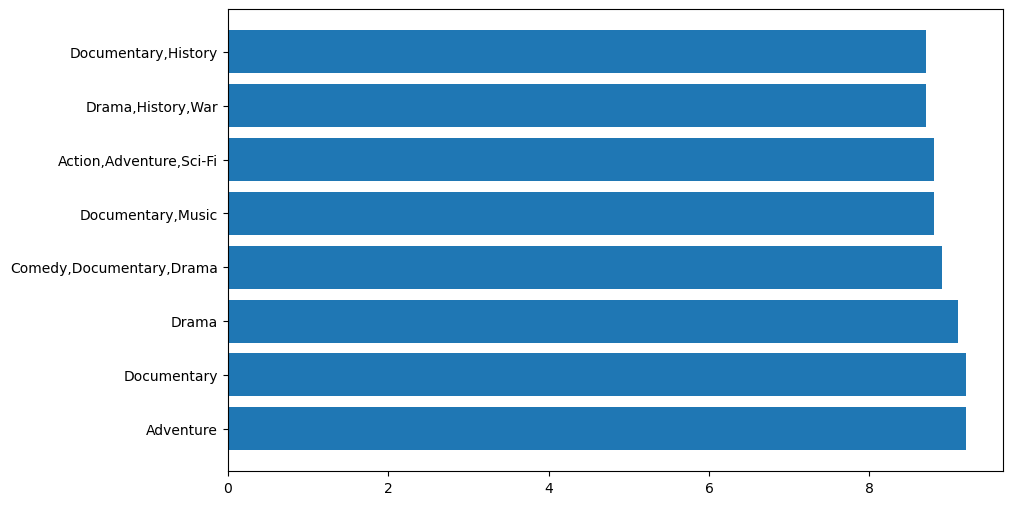

In [224]:
#Plotting a bar chart of the top ten movie genre based on average rating
x= Top_ten_movie_genre['genres'].head(10)
y= Top_ten_movie_genre['averagerating'].head(10)

plt.figure(figsize=(10,6))
plt.barh(x, y, label = 'Top ten genres')
plt.xlabel('Rating')
plt.ylabel('Genres')
plt.title('Top Ten Movie Genres')
plt.legend()
plt.show()

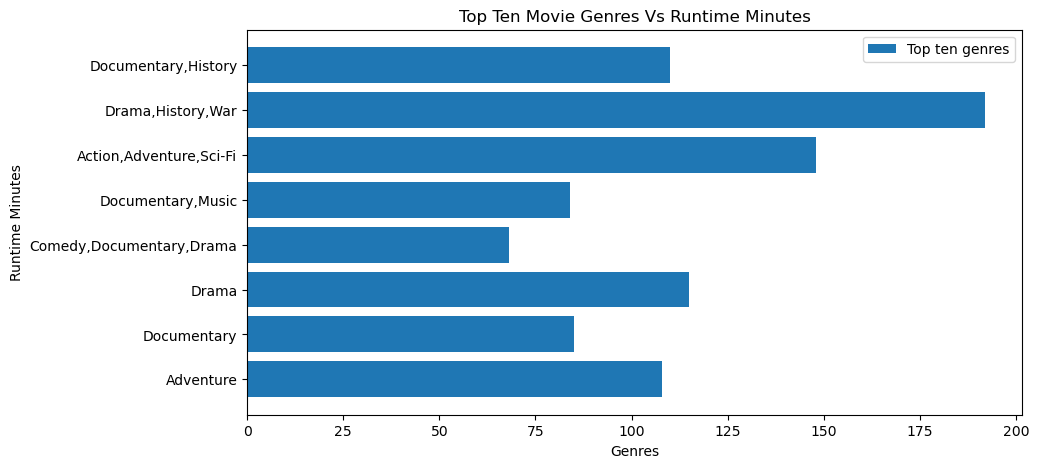

In [183]:
#plot bar chart of the runtime of the top genres 
x= Top_ten_movie_genre['genres'].head(10)
y= Top_ten_movie_genre['runtime_minutes'].head(10)

plt.figure(figsize=(10,5))
plt.barh(x, y, label = 'Top ten genres')
plt.xlabel('Genres')
plt.ylabel('Runtime Minutes')
plt.title('Top Ten Movie Genres Vs Runtime Minutes')
plt.legend()
plt.show()

In [181]:
movie_genres_votes.head(10)

,genres,runtime_minutes,numvotes,studio
485,"Action,Adventure,Sci-Fi",148.0,1841066,WB
456,"Action,Thriller",164.0,1387769,WB
101,"Adventure,Drama,Sci-Fi",169.0,1299334,Par.
1296,"Drama,Western",165.0,1211405,Wein.
162,"Biography,Crime,Drama",180.0,1035358,Par.
236,"Mystery,Thriller",138.0,1005960,Par.
1476,"Action,Adventure,Comedy",121.0,948394,BV
574,"Action,Adventure,Comedy",108.0,820847,Fox
501,"Action,Adventure,Sci-Fi",142.0,795227,LGF
502,"Action,Adventure,Sci-Fi",120.0,780910,WB


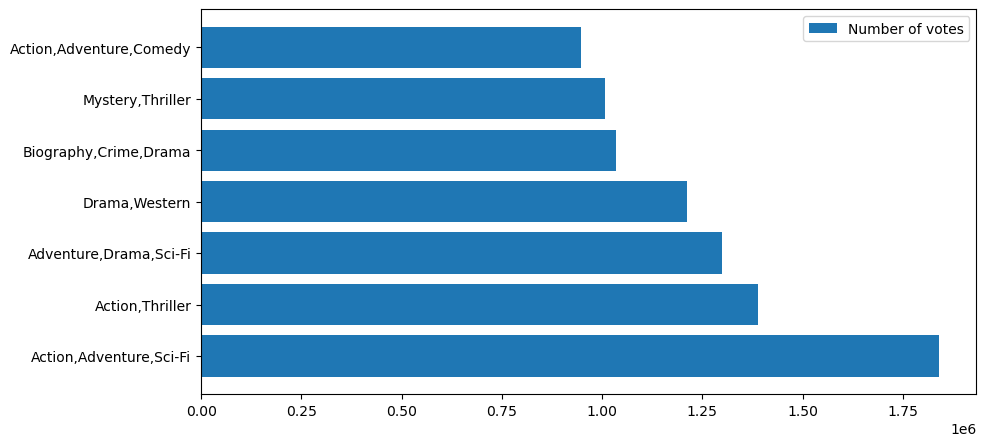

In [196]:
# Plot barchart of the number of votes of the top ten genres 
x = movie_genres_votes['genres'].head(10)
y = movie_genres_votes['numvotes'].head(10)

plt.figure(figsize=(10,5))
plt.barh(x, y, label = 'Number of votes')
plt.xlabel = ('Genres')
plt.ylabel = ('Number of Votes')
plt.title = ('Number of Votes Barchart')
plt.legend()
plt.show()




In [197]:
Top_ten_movie_grosscollected.head(10)

,genres,averagerating,studio,domestic_gross,foreign_gross,profits
171,Adventure,9.2,App.,3600000.0,1100000.0,-2500000.0
626,Documentary,9.2,RAtt.,1800000.0,2700000.0,900000.0
2029,Drama,9.1,UTMW,62500.0,18700000.0,18637500.0
607,Documentary,9.0,PDA,4400000.0,18700000.0,14300000.0
1135,"Comedy,Documentary,Drama",8.9,WGUSA,96800.0,18700000.0,18603200.0
2951,"Documentary,Music",8.8,Trafalgar,4200000.0,16100000.0,11900000.0
485,"Action,Adventure,Sci-Fi",8.8,WB,292600000.0,535700000.0,243100000.0
795,Documentary,8.8,Magn.,1200.0,18700000.0,18698800.0
480,"Drama,History,War",8.7,Wein.,757000.0,315000.0,-442000.0
1047,"Documentary,History",8.7,NAV,26300.0,250000.0,223700.0


In [223]:
Top_ten_movie_grosscollected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2952 entries, 171 to 2927
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          2952 non-null   object 
 1   averagerating   2952 non-null   float64
 2   studio          2952 non-null   object 
 3   domestic_gross  2952 non-null   float64
 4   foreign_gross   2952 non-null   float64
 5   profits         2952 non-null   float64
dtypes: float64(4), object(2)
memory usage: 161.4+ KB


In [222]:

x1 = Top_ten_movie_grosscollected['genres']
y1 = Top_ten_movie_grosscollected['domestic_gross']
x2 = Top_ten_movie_grosscollected['genres']
y2 = Top_ten_movie_grosscollected['foreign_gross']
 
plt.figure(figsize=(10,5))
plt.hist(Top_ten_movie_grosscollected['domestic_gross'], bins = int(Top_ten_movie_grosscollected / 1000), edgecolor = 'black')
plt.show()







TypeError: unsupported operand type(s) for /: 'str' and 'int'

<Figure size 1000x500 with 0 Axes>

In [226]:
np.linspace(0,1000, num=100)

array([   0.        ,   10.1010101 ,   20.2020202 ,   30.3030303 ,
         40.4040404 ,   50.50505051,   60.60606061,   70.70707071,
         80.80808081,   90.90909091,  101.01010101,  111.11111111,
        121.21212121,  131.31313131,  141.41414141,  151.51515152,
        161.61616162,  171.71717172,  181.81818182,  191.91919192,
        202.02020202,  212.12121212,  222.22222222,  232.32323232,
        242.42424242,  252.52525253,  262.62626263,  272.72727273,
        282.82828283,  292.92929293,  303.03030303,  313.13131313,
        323.23232323,  333.33333333,  343.43434343,  353.53535354,
        363.63636364,  373.73737374,  383.83838384,  393.93939394,
        404.04040404,  414.14141414,  424.24242424,  434.34343434,
        444.44444444,  454.54545455,  464.64646465,  474.74747475,
        484.84848485,  494.94949495,  505.05050505,  515.15151515,
        525.25252525,  535.35353535,  545.45454545,  555.55555556,
        565.65656566,  575.75757576,  585.85858586,  595.95959

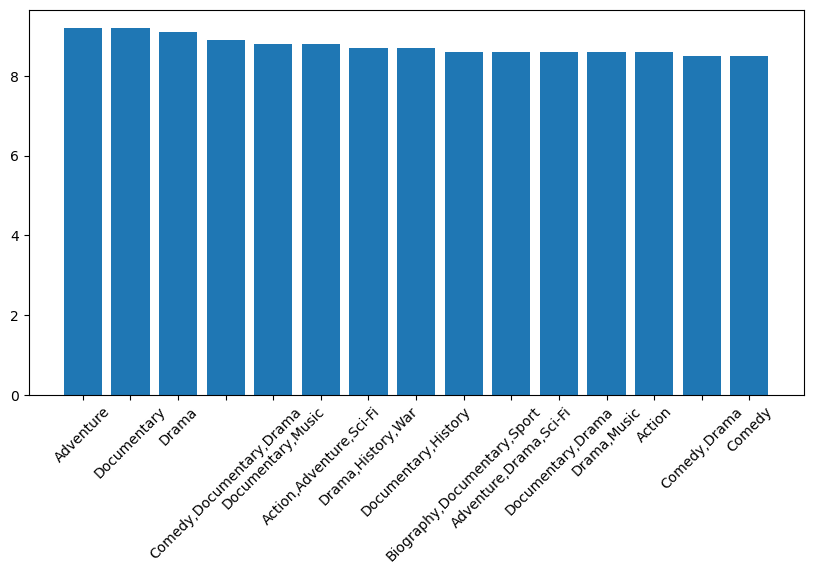

In [218]:
#Plotting a bar chart of the top ten movie genre based on average rating
x= Top_ten_movie_genre['genres'].head(20)
y= Top_ten_movie_genre['averagerating'].head(20)

plt.figure(figsize=(10,5))
plt.bar(x, y, label = 'Top ten genres')
plt.xticks(rotation = 45);